In [44]:
import pandas as pd
dataset = pd.read_csv('regression.txt')
dataset.describe()

,x,y
count,240.000000,240.000000
mean,0.505000,0.103008
std,0.287565,1.029367
min,0.010000,-1.909000
25%,0.257750,-0.676000
50%,0.505000,0.185500
75%,0.752250,0.741500
max,1.000000,2.286000


In the following section we are creating the `train_set` and `test_set` from the given dataset.

In [45]:
dataset_copy = dataset.copy()
train_set = dataset_copy.sample(frac=2/3, random_state=0)
test_set = dataset_copy.drop(train_set.index)

In the following section we want to create a map between the features tuple and its result

In [49]:
train_classified = {}
for _, d in train_set.iterrows():
    train_classified[d['x']] = d['y']

In [55]:
def knn(classified, k):
    def predict(point):
        distances = []
        for t in classified:
            distance = 0
            distance += (float(point) - float(t)) ** 2
            distances.append((distance, classified[t]))
        distances.sort()
        prediction = 0
        for _, s in distances[:k]:
            prediction += s
        return prediction / k
    return predict


for k in range(1, 15): # loop over k values to see their MSE
    mse = 0
    i = 0
    for _, t in test_set.iterrows():
        actual = t['y']
        predicted = knn(train_classified, k)(t['x'])
        mse += (actual - predicted) ** 2
        i += 1
    mse = mse / i

    print(f'{f"k = {k}":-^20}\n')

    print(f'mse: {mse}\n')

-------k = 1--------

mse: 0.07932028750000003

-------k = 2--------

mse: 0.069606471875

-------k = 3--------

mse: 0.06177187499999996

-------k = 4--------

mse: 0.0592282203125

-------k = 5--------

mse: 0.0589114915

-------k = 6--------

mse: 0.0532770638888889

-------k = 7--------

mse: 0.05803623163265305

-------k = 8--------

mse: 0.05667718339843751

-------k = 9--------

mse: 0.057520169753086436

-------k = 10-------

mse: 0.05735824650000002

-------k = 11-------

mse: 0.05658719214876033

-------k = 12-------

mse: 0.057667771006944445

-------k = 13-------

mse: 0.06359133942307693

-------k = 14-------

mse: 0.06538542538265307



Here we are creating a plot for `test set` and its prediction based on `train set`. from the previous cell we choose `k = 8`.

<IPython.core.display.Javascript object>


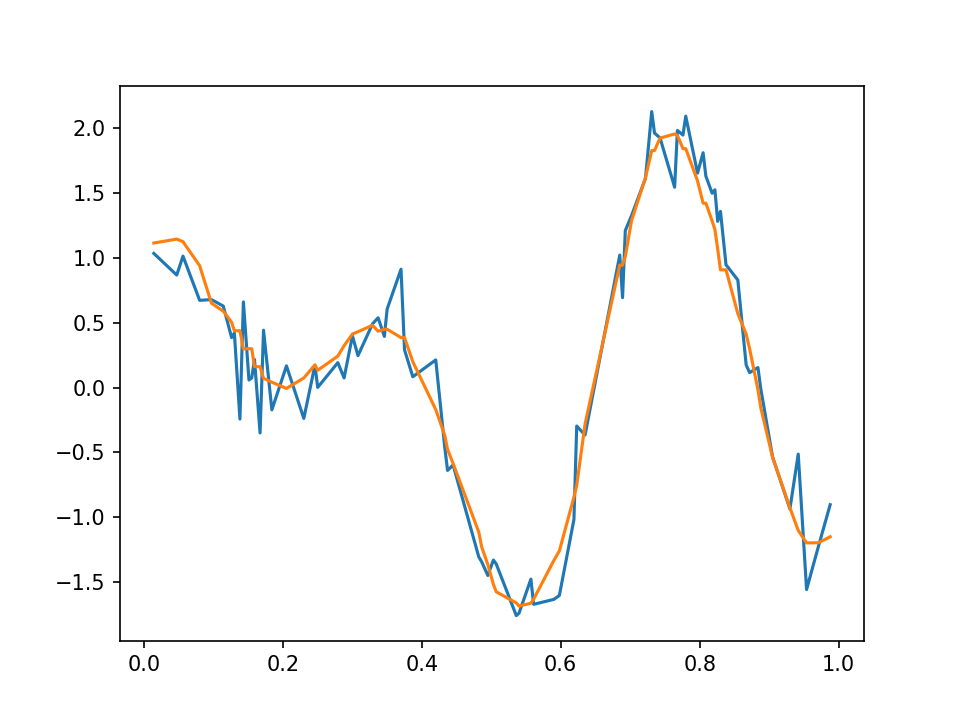

In [56]:
import matplotlib.pyplot as plt
%matplotlib notebook

k = 8 # this will be used as a knn meta-parameter

plt.figure()
plt.plot([t['x'] for _, t in test_set.iterrows()], [t['y'] for _, t in test_set.iterrows()])
plt.plot([t['x'] for _, t in test_set.iterrows()], [knn(train_classified, k)(t['x']) for _, t in test_set.iterrows()])
